<center><h1>Tugas 2</h1></center>
<center><h2>Sains Data Genap 2020/2021</h2></center>

In [222]:
#Input NPM
NPM = ""

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini (jika ada)
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini (jika ada)
REFERENSI = []

In [223]:
# import library data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
from scipy import stats

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
import plotly.express as px

In [224]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Lab DS/Tugas 2/cancer_reg.csv',encoding = "ISO-8859-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


# Preprocessing

### NO 1. 

In [226]:
# Ringkasan mengenai data setiap kolom 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

Data di atas memiliki 36 atribut yang cukup beragam. Terdapat tiga tipe atribut berbeda pada data tersebut, yaitu int64, float64, dan object.  

In [227]:
# Jumlah atribut numerik

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
attr_num = df.select_dtypes(include = numerics)
print("Jumlah atribut numerik pada data adalah" , len(attr_num.columns))

Jumlah atribut numerik pada data adalah 34


In [228]:
# Melihat deskripsi statistik dari kelompok fitur numerik

attr_num.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1.467017,2.084345
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.498993,0.737185
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,1.000000,2.000000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1.000000,2.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.000000,3.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,2.000000,3.000000


In [229]:
# Jumlah atribut kategorik

jumlah_numerik = len(attr_num.columns)
print("Jumlah atribut kategorik pada data adalah" , (len(df.columns) - jumlah_numerik ))

Jumlah atribut kategorik pada data adalah 2


In [230]:
# Melihat deskripsi statistik dari kelompok fitur kategorik

display(df.describe(include=np.object))

,binnedInc,Geography
count,3047,3047
unique,10,3047
top,"[22640, 34218.1]","Benton County, Tennessee"
freq,306,1


In [231]:
# Jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
cek_missing_values(df)

,Total,Percent
PctSomeCol18_24,2285,0.749918
PctPrivateCoverageAlone,609,0.199869
PctEmployed16_Over,152,0.049885


Data di atas memiliki missing values yang berasal dari beberapa atribut yang total jumlah missing valuesnya adalah 2946.

In [232]:
# Jumlah duplikasi data

print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [233]:
# Jumlah kemungkinan adanya outliers pada data

# Menampilkan banyaknya outlier pada setiap atribut menggunakan IQR.

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:\n")
print(outliers.sum())

Outlier pada tiap atribut:

AvgHouseholdSize           201
BirthRate                  164
Geography                    0
MedianAge                   93
MedianAgeFemale             78
MedianAgeMale               89
PctAsian                   323
PctBachDeg18_24             94
PctBachDeg25_Over           82
PctBlack                   395
PctEmpPrivCoverage           9
PctEmployed16_Over          20
PctHS18_24                  52
PctHS25_Over                31
PctMarriedHouseholds       100
PctNoHS18_24                69
PctOtherRace               297
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctSomeCol18_24             31
PctUnemployed16_Over        68
PctWhite                   174
PercentMarried              68
TARGET_deathRate            64
TARGET_logistic              0
TARGET_softmax               0
avgAnnCount                461
avgDeathsPerYear           349
binnedInc                    0
incidenceRa

Berdasarkan hasil di atas, atribut yang kemungkinan mengandung outlier paling adalah studyPerCap.

### NO 2. 

In [234]:
# Menangani missing values dengan mengganti atribut numerik dengan mean dan atribut kategorikal dengan modus.

mean_PctSomeCol18_24 = df.PctSomeCol18_24.mean()
df.PctSomeCol18_24.fillna(mean_PctSomeCol18_24,inplace=True)

mean_PctPrivateCoverageAlone = df.PctPrivateCoverageAlone.mean()
df.PctPrivateCoverageAlone.fillna(mean_PctPrivateCoverageAlone,inplace=True)

mean_PctEmployed16_Over = df.PctEmployed16_Over.mean()
df.PctEmployed16_Over.fillna(mean_PctEmployed16_Over,inplace=True)

In [235]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [236]:
cek_null(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [237]:
# Menangani duplikasi data

print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum(), 'sehingga tidak perlu ditangani.')

Jumlah duplikasi pada data adalah 0 sehingga tidak perlu ditangani.


In [238]:
# Menangani outliers pada atribut 

# Mengambil hanya fitur dengan tipe data numerik dan mengabaikan tipe data kategorik
df_cleaned = df.select_dtypes(np.number)
df_cleaned.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


In [239]:
df_cleaned.shape

(3047, 34)

In [240]:
# Menangani outliers pada atribut 

df_cleaned = df_cleaned[~((df_cleaned <= lower_limit) | (df_cleaned >= upper_limit)).any(axis=1)]
df_cleaned.shape

(1229, 34)

### NO 3. 

Klasifikasi pada data ini perlu di-normalisasi untuk menghilangkan dan mengurangi redudansi data. Karena distribusi data pada database ini cukup sangat beragam. Data ini juga terdiri dari atribut bertipe numerik dan kategorikal sehingga jika data dalam database tersebut belum di-normalisasi maka akan terjadi kemungkinan-kemungkinan yang akan merugikan sistem secara keseluruhan. 

Bentuk normalisasi yang dipilih adalah StandardScaler. StandardScaler mengubah setiap nilai dalam kolom ke kisaran tentang mean 0 dan deviasi standar 1, yaitu, setiap nilai akan dinormalisasi dengan mengurangi mean dan membaginya dengan deviasi standar. normalisasi ini digunakan karena outlier sudah ditangani.

In [241]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 1 to 3017
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              1229 non-null   float64
 1   avgDeathsPerYear         1229 non-null   int64  
 2   TARGET_deathRate         1229 non-null   float64
 3   incidenceRate            1229 non-null   float64
 4   medIncome                1229 non-null   int64  
 5   popEst2015               1229 non-null   int64  
 6   povertyPercent           1229 non-null   float64
 7   studyPerCap              1229 non-null   float64
 8   MedianAge                1229 non-null   float64
 9   MedianAgeMale            1229 non-null   float64
 10  MedianAgeFemale          1229 non-null   float64
 11  AvgHouseholdSize         1229 non-null   float64
 12  PercentMarried           1229 non-null   float64
 13  PctNoHS18_24             1229 non-null   float64
 14  PctHS18_24              

In [242]:
from sklearn.preprocessing import StandardScaler

# Define data, data yang digunakan merupakan data yang telah dibersihkan
# Split data table into data X and class labels y 

X = df_cleaned.drop('TARGET_deathRate',axis=1)
X = X.drop('TARGET_logistic',axis=1)
X = X.drop('TARGET_softmax',axis=1)
Y = df_cleaned['TARGET_deathRate']
y_logistic = df_cleaned['TARGET_logistic']
y_softmax = df_cleaned['TARGET_softmax']

# Define 
scaler = StandardScaler()

# Transform data
scaled = scaler.fit_transform(X)

print(scaled.mean(axis=0))
print(scaled.std(axis=0))

[-2.02351471e-17 -8.09405883e-17  9.71287059e-16 -6.35961765e-17
  8.09405883e-17 -4.01812206e-16 -1.58990441e-17  1.42224177e-15
  1.32973824e-15  1.14473118e-15  2.54384706e-16  4.62517647e-16
  1.15629412e-16 -4.50954706e-16 -2.15648853e-15  2.42821765e-16
 -4.85643530e-16  1.50318235e-16 -3.98921471e-16  4.24938089e-16
  7.40028236e-16 -9.01909412e-16 -4.62517647e-16  4.39391765e-16
  3.46888236e-16  1.63615618e-15  1.04066471e-16  1.06957206e-16
 -6.93776471e-17 -1.21989029e-15  2.19695882e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


# Linear Regression

## No 1.

In [243]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

# Linear Regression (sklearn) pada data hasil preprocessing menggunakan default
X_train, X_test, y_train, y_test = train_test_split(scaled, Y , test_size=None, random_state=None)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

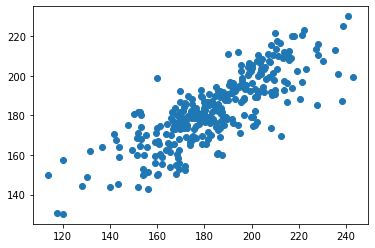

In [244]:
y_linear_predict = reg.predict(X_test)

# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_linear_predict)

In [245]:
import math 
from sklearn import metrics

# Nilai MSE, MAE, RMSE, dan R2 Square
print("MSE:", metrics.mean_squared_error(y_test, y_linear_predict))
print("MAE:", metrics.mean_absolute_error(y_test, y_linear_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_linear_predict))) 
print("R2 Square:", metrics.r2_score(y_test, y_linear_predict))

MSE: 181.35850891829554
MAE: 10.042828728383807
RMSE:  13.466941334924407
R2 Square: 0.651105959841161


## No 2.

In [246]:
# Ridge Regression pada data hasil preprocessing menggunakan default 

rng = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
rng.fit(X_train, y_train)

y_rigde_predcit = rng.predict(X_test)

In [247]:
# Nilai MSE dan R2 Square 
print("MSE:", metrics.mean_squared_error(y_test, y_rigde_predcit))
print("R2 Square:", metrics.r2_score(y_test, y_rigde_predcit))

MSE: 187.3140217827012
R2 Square: 0.6396488577902364


In [248]:
# Mengubah parameter TOL menjadi 0.01

rng = Ridge(alpha=15.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
rng.fit(X_train, y_train)

y_rigde_predcit = rng.predict(X_test)

In [249]:
# Nilai R2 Square
print("R2 Square:", metrics.r2_score(y_test, y_rigde_predcit))

R2 Square: 0.5315421713349981


Parameter TOL sudah diubah tetapi nilai MSE maupun R2 Square masih tetap sama.

## No 3.

In [250]:
# Lasso Regression pada data hasil preprocessing menggunakan default

lasso = Lasso(alpha=1.0,fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso.fit(X_train, y_train)

y_lasso_predict = lasso.predict(X_test)

In [251]:
# Nilai R2 Square 

print("R2 Square:", metrics.r2_score(y_test, y_lasso_predict))

R2 Square: 0.41433945161000496


In [252]:
# Mengubah parameter TOL menjadi 0.1

lasso = Lasso(alpha=15.0,fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso.fit(X_train, y_train)

y_lasso_predict = lasso.predict(X_test)

In [253]:
# Nilai R2 Square 

print("R2 Square:", metrics.r2_score(y_test, y_lasso_predict))

R2 Square: -0.0004042065456448807


Hasil nilai R2 Square yang diberikan berbeda. Setelah parameter TOL diubah menjadi lebih besar, nilai R2 Square yang dihasilkan menjadi lebih kecil. Hal ini menjadikan parameter TOL berbanding terbalik dengan nilai R2 Square.

# Logistic and Softmax Regression

## No. 1

In [254]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(scaled, y_logistic , test_size=None, random_state=None)

In [255]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

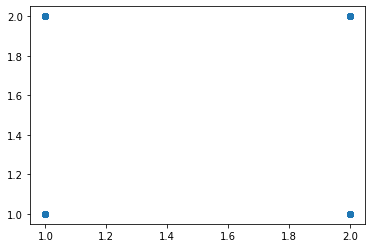

In [256]:
plt.figure
plt.scatter(y_test, y_pred_clf)

In [257]:
clf.score(X_test, y_test)

0.814935064935065

## No. 2

In [258]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y_softmax , test_size=None, random_state=None)

In [259]:
#WIP : LOGISTIC AND SOFTMAX REGRESSION
from sklearn.linear_model import LogisticRegression
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
y_pred_softmax = softReg.predict(X_test)

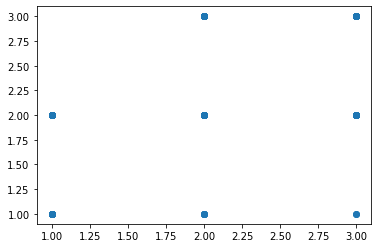

In [261]:
plt.figure
plt.scatter(y_test, y_pred_softmax)

In [262]:
softReg.score(X_test, y_test)

0.6915584415584416